In [3]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 15.6 MB/s eta 0:00:00


In [7]:
#YOLO
model = YOLO("yolov8m.pt")
#YOLOv8 is a group of neural network models.
#The bigger the model you choose, the better the prediction quality you can achieve, but the slower it will work.
#It will download the yolov8m.pt file from the Ultralytics server to the current folder. Then it will construct the model object.
#Now you can train this model, detect objects, and export it to use in production.

#All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types. So, if you do not have specific needs, then you can just run it as is, without additional training.


100%|██████████| 49.7M/49.7M [00:00<00:00, 204MB/s]


In [37]:
print(result.names) #This dictionary has everything that this model can detect.
#Recall that there are 80 classes. It assigns 0 or close to 0 probabilities for those classes which are not in the image

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

Saving furniture.jpg to furniture (1).jpg

image 1/1 /content/furniture (1).jpg: 448x640 4 persons, 3 cups, 1 bowl, 2 chairs, 2 couchs, 5 potted plants, 4 dining tables, 1 remote, 1 cell phone, 2 vases, 1082.4ms
Speed: 3.3ms preprocess, 1082.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


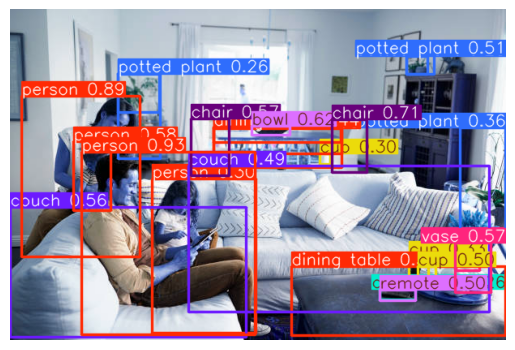

Detected objects in furniture (1).jpg: 25
Object type: person
Coordinates: [89, 177, 302, 402]
Probability: 0.93

Next Object
Object type: person
Coordinates: [14, 108, 160, 306]
Probability: 0.89

Next Object
Object type: chair
Coordinates: [397, 137, 441, 201]
Probability: 0.71

Next Object
Object type: bowl
Coordinates: [298, 144, 346, 156]
Probability: 0.62

Next Object
Object type: person
Coordinates: [78, 164, 124, 249]
Probability: 0.58

Next Object
Object type: chair
Coordinates: [223, 135, 271, 205]
Probability: 0.57

Next Object
Object type: vase
Coordinates: [550, 288, 593, 349]
Probability: 0.57

Next Object
Object type: couch
Coordinates: [1, 244, 291, 404]
Probability: 0.56

Next Object
Object type: potted plant
Coordinates: [489, 57, 523, 81]
Probability: 0.51

Next Object
Object type: remote
Coordinates: [456, 346, 501, 359]
Probability: 0.5

Next Object
Object type: cup
Coordinates: [504, 317, 526, 344]
Probability: 0.5

Next Object
Object type: couch
Coordinates: [221

In [46]:
#FURNITURE YOLO
from google.colab import files
import os
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)


Saving airplanes.jpg to airplanes (2).jpg

image 1/1 /content/airplanes (2).jpg: 448x640 2 persons, 3 airplanes, 1088.8ms
Speed: 2.9ms preprocess, 1088.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


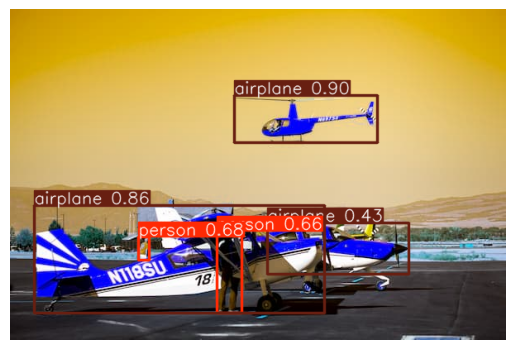

Detected objects in airplanes (2).jpg: 5
Object type: airplane
Coordinates: [272, 105, 444, 161]
Probability: 0.9

Next Object
Object type: airplane
Coordinates: [30, 238, 380, 368]
Probability: 0.86

Next Object
Object type: person
Coordinates: [155, 275, 169, 303]
Probability: 0.68

Next Object
Object type: person
Coordinates: [250, 268, 280, 367]
Probability: 0.66

Next Object
Object type: airplane
Coordinates: [312, 259, 482, 320]
Probability: 0.43

Next Object


In [47]:
#AIRPLANES YOLO
# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)


Saving zebra.jpg to zebra.jpg

image 1/1 /content/zebra.jpg: 448x640 3 zebras, 4 giraffes, 1113.9ms
Speed: 4.2ms preprocess, 1113.9ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


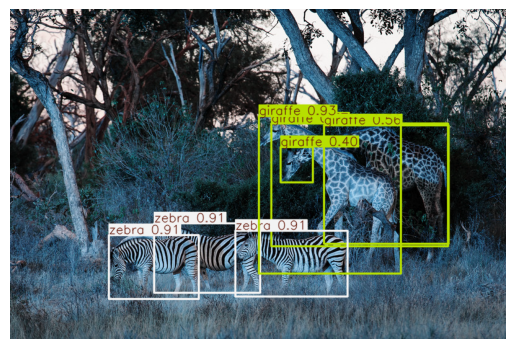

Detected objects in zebra.jpg: 7
Object type: giraffe
Coordinates: [401, 173, 631, 426]
Probability: 0.93

Next Object
Object type: zebra
Coordinates: [363, 358, 545, 463]
Probability: 0.91

Next Object
Object type: zebra
Coordinates: [159, 364, 305, 468]
Probability: 0.91

Next Object
Object type: zebra
Coordinates: [232, 345, 404, 457]
Probability: 0.91

Next Object
Object type: giraffe
Coordinates: [507, 188, 708, 379]
Probability: 0.56

Next Object
Object type: giraffe
Coordinates: [436, 223, 488, 279]
Probability: 0.4

Next Object
Object type: giraffe
Coordinates: [421, 185, 706, 383]
Probability: 0.37

Next Object


In [43]:
#ZEBRA YOLO
# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)

Saving ski.jpg to ski.jpg

image 1/1 /content/ski.jpg: 448x640 15 persons, 2 backpacks, 5 skiss, 1088.6ms
Speed: 3.7ms preprocess, 1088.6ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


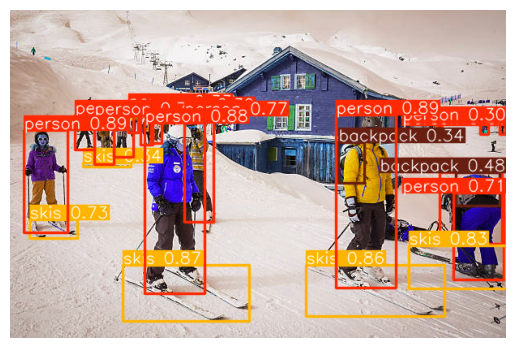

Detected objects in ski.jpg: 22
Object type: person
Coordinates: [18, 149, 71, 276]
Probability: 0.89

Next Object
Object type: person
Coordinates: [403, 131, 477, 343]
Probability: 0.89

Next Object
Object type: person
Coordinates: [167, 141, 241, 350]
Probability: 0.88

Next Object
Object type: skis
Coordinates: [140, 315, 295, 384]
Probability: 0.87

Next Object
Object type: skis
Coordinates: [366, 315, 536, 378]
Probability: 0.86

Next Object
Object type: skis
Coordinates: [492, 292, 612, 345]
Probability: 0.83

Next Object
Object type: person
Coordinates: [216, 131, 252, 262]
Probability: 0.77

Next Object
Object type: person
Coordinates: [104, 132, 129, 192]
Probability: 0.75

Next Object
Object type: skis
Coordinates: [24, 259, 83, 283]
Probability: 0.73

Next Object
Object type: person
Coordinates: [548, 226, 609, 333]
Probability: 0.71

Next Object
Object type: person
Coordinates: [81, 130, 104, 174]
Probability: 0.66

Next Object
Object type: person
Coordinates: [129, 133, 15

In [38]:
#SNOW YOLO
# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)


Saving kitchen.jpg to kitchen.jpg

image 1/1 /content/kitchen.jpg: 448x640 1 bottle, 4 cups, 1 fork, 1 knife, 3 spoons, 4 bowls, 7 potted plants, 1 dining table, 1 sink, 1 vase, 1500.0ms
Speed: 4.3ms preprocess, 1500.0ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


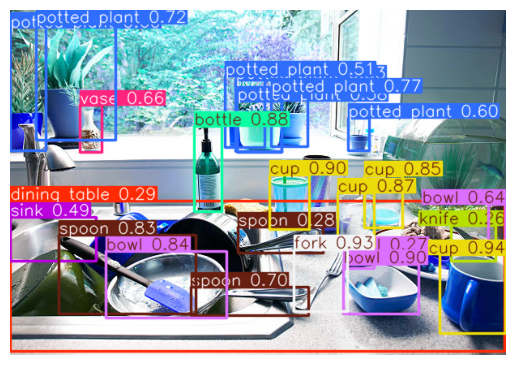

Detected objects in kitchen.jpg: 24
Object type: cup
Coordinates: [531, 303, 612, 399]
Probability: 0.94

Next Object
Object type: fork
Coordinates: [351, 296, 417, 372]
Probability: 0.93

Next Object
Object type: bowl
Coordinates: [412, 315, 504, 375]
Probability: 0.9

Next Object
Object type: cup
Coordinates: [321, 205, 369, 272]
Probability: 0.9

Next Object
Object type: bottle
Coordinates: [228, 144, 261, 250]
Probability: 0.88

Next Object
Object type: cup
Coordinates: [405, 227, 450, 294]
Probability: 0.87

Next Object
Object type: cup
Coordinates: [438, 206, 485, 270]
Probability: 0.85

Next Object
Object type: bowl
Coordinates: [118, 299, 268, 381]
Probability: 0.84

Next Object
Object type: spoon
Coordinates: [60, 279, 230, 376]
Probability: 0.83

Next Object
Object type: potted plant
Coordinates: [323, 104, 368, 170]
Probability: 0.77

Next Object
Object type: potted plant
Coordinates: [33, 19, 130, 162]
Probability: 0.72

Next Object
Object type: spoon
Coordinates: [223, 342

In [33]:
#KITCHEN YOLO
# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)

Saving street.jpg to street.jpg

image 1/1 /content/street.jpg: 448x640 9 persons, 2 bicycles, 13 cars, 1 bus, 8 traffic lights, 2 handbags, 1 skateboard, 1132.6ms
Speed: 3.4ms preprocess, 1132.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


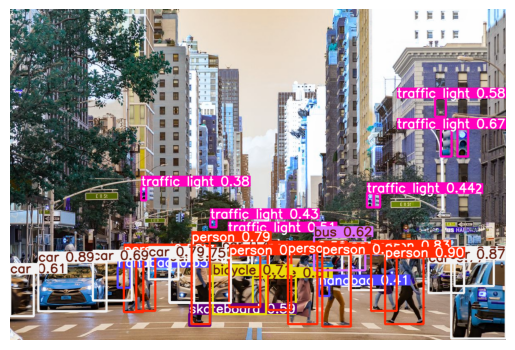

Detected objects in street.jpg: 36
Object type: person
Coordinates: [907, 601, 1001, 762]
Probability: 0.9

Next Object
Object type: car
Coordinates: [68, 612, 233, 730]
Probability: 0.89

Next Object
Object type: car
Coordinates: [1068, 604, 1199, 797]
Probability: 0.87

Next Object
Object type: person
Coordinates: [756, 593, 824, 767]
Probability: 0.85

Next Object
Object type: person
Coordinates: [873, 584, 935, 729]
Probability: 0.83

Next Object
Object type: person
Coordinates: [672, 590, 744, 762]
Probability: 0.82

Next Object
Object type: person
Coordinates: [439, 563, 484, 762]
Probability: 0.79

Next Object
Object type: car
Coordinates: [336, 599, 408, 653]
Probability: 0.79

Next Object
Object type: car
Coordinates: [1013, 613, 1099, 687]
Probability: 0.77

Next Object
Object type: car
Coordinates: [387, 601, 534, 710]
Probability: 0.75

Next Object
Object type: car
Coordinates: [821, 588, 908, 679]
Probability: 0.73

Next Object
Object type: person
Coordinates: [530, 594, 6

In [41]:
#STREET YOLO

# Upload image files
uploaded = files.upload()

# Initialize YOLOv8 model
model = YOLO("yolov8m.pt")

# Function to process each image and display results
def process_image(image_path):
    # Make prediction on the uploaded image
    results = model.predict(image_path)  # it returns an array with a single item
    result = results[0]  # Get the result (contains detected objects)

    # Display the image with predictions
    annotated_image = result.plot()  # Annotated image with bounding boxes
    plt.imshow(annotated_image)
    plt.axis('off')  # Turn off axes for better visualization
    plt.show()

    # Save the annotated image
    annotated_image_pil = Image.fromarray(annotated_image)
    annotated_image_pil.save(f"detected_objects_{os.path.basename(image_path)}")

    # Print the number of detected objects
    print(f"Detected objects in {image_path}: {len(result.boxes)}")

    # Print details of detected objects (type, coordinates, confidence)
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]  # Object type
        cords = box.xyxy[0].tolist()  # Coordinates
        cords = [round(x) for x in cords]  # Round coordinates
        conf = round(box.conf[0].item(), 2)  # Confidence
        print(f"Object type: {class_id}")
        print(f"Coordinates: {cords}")
        print(f"Probability: {conf}")
        print("\nNext Object")

# Loop through all uploaded files
for image_file in uploaded.keys():
    # Process each uploaded image
    process_image(image_file)

In [20]:
## FASTER RCNN
import torch
import torchvision.transforms.functional as F
import torchvision.models.detection as detection
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [21]:
#We will use the pre-trained FasterRCNN_ResNet50_FPN model. This model is trained with the COCO dataset
#Let us see the COCO dataset classes. These classes will be printed in the image
from torchvision.models.detection.faster_rcnn import FasterRCNN_ResNet50_FPN_Weights

# Load the metadata for the pre-trained model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
COCO_CLASSES = weights.meta["categories"]  # Fetch the class names dynamically

print(COCO_CLASSES)

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 115MB/s]


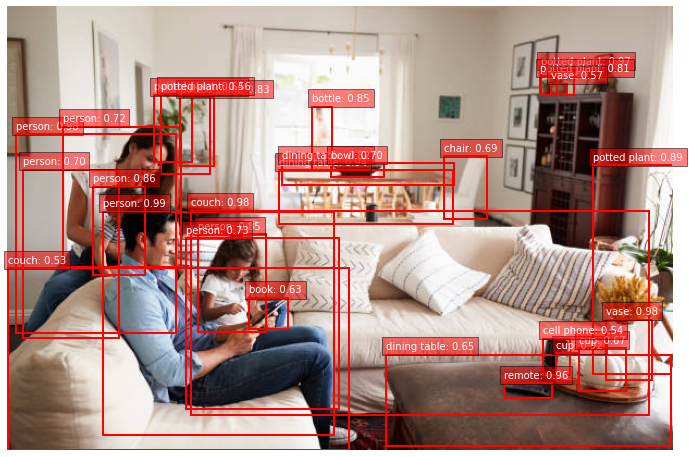

In [22]:
#FURNITURE RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "furniture.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

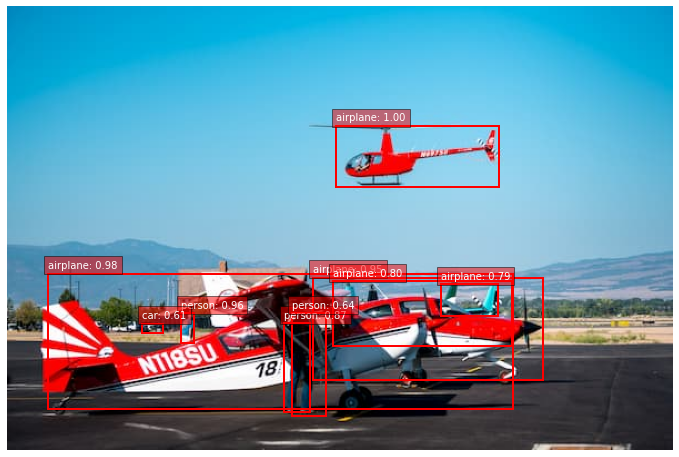

In [23]:
#AIRPLANES RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "airplanes.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

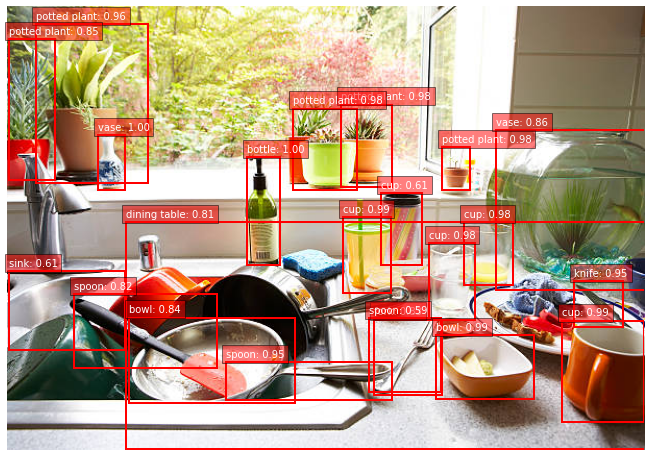

In [34]:
#KITCHEN RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "kitchen.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

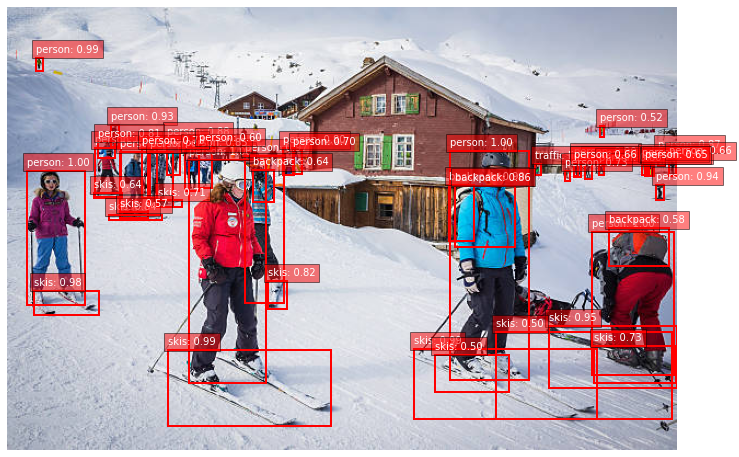

In [40]:
#SNOW RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "ski.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

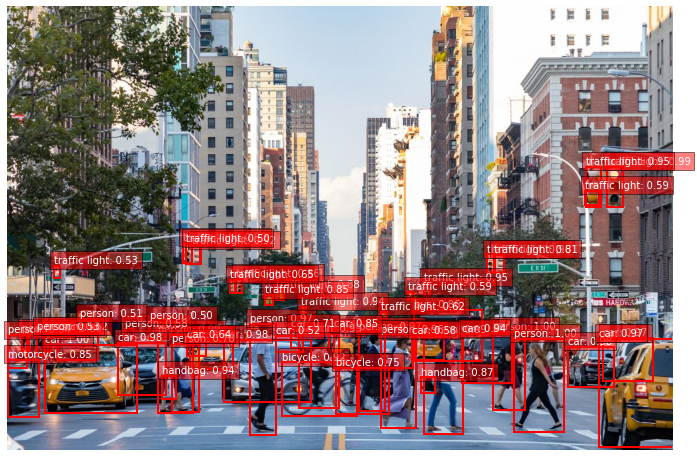

In [42]:
#STREET RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "street.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

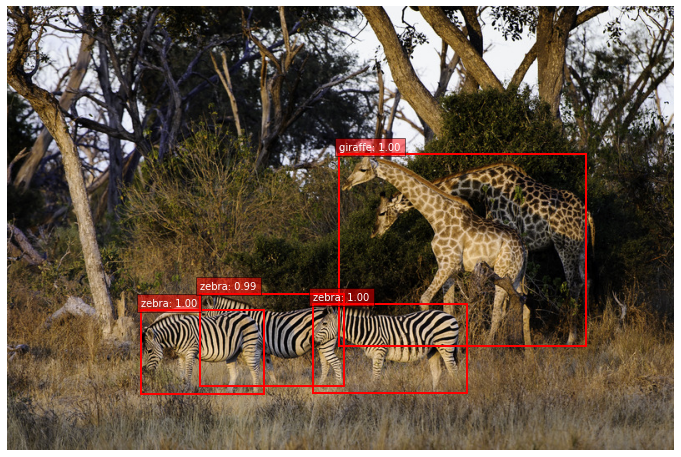

In [45]:
#ZEBRA RCNN
# Step 1: Load the pre-trained Faster R-CNN model
model = detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 2: Load the image
image_path = "zebra.jpg"
image = Image.open(image_path)
# Convert the image to a tensor in the C (channels), H (height), and W (weight)
image_tensor = F.to_tensor(image) #Converts the input image (loaded using PIL) into a tensor format required by PyTorch models.


# Step 3: Perform object detection
with torch.no_grad():
    predictions = model([image_tensor])

# Step 4: Extract predictions
predicted_boxes = predictions[0]['boxes']  # Bounding boxes
predicted_scores = predictions[0]['scores']  # Confidence scores
predicted_labels = predictions[0]['labels']  # Class indices

#Filter predictions by confidence threshold. Let us assume that we are only interested in those prediction which are above 0.5
confidence_threshold = 0.5
filtered_boxes = []
filtered_scores = []
filtered_labels = []

for box, score, label in zip(predicted_boxes, predicted_scores, predicted_labels):
    if score >= confidence_threshold:
        filtered_boxes.append(box)
        filtered_scores.append(score)
        filtered_labels.append(label)

# Step 5: Annotate the image with bounding boxes and class names
fig, ax = plt.subplots(1, figsize=(12, 8), dpi=72)  # Set the figure size and resolution
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    x_min, y_min, x_max, y_max = box.tolist()
    class_name = COCO_CLASSES[label.item()]  # Map label to class name

    # Draw the bounding box
    rect = patches.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add the class name and score as text
    ax.text(
        x_min,
        y_min - 5,
        f"{class_name}: {score:.2f}",
        color='white',
        fontsize=10,
        bbox=dict(facecolor='red', alpha=0.5)
    )

plt.axis("off")  # Hide axes for better visualization
plt.show()

In [49]:
import os
import time
import pandas as pd
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
from torchvision import models, transforms
import torch.nn.functional as F
import numpy as np

# Upload images
uploaded = files.upload()

# Load YOLOv8 model
yolo_model = YOLO("yolov8m.pt")

# Load Faster R-CNN model from torchvision (pre-trained on COCO dataset)
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Preprocessing for Faster R-CNN
preprocess = transforms.Compose([
    transforms.ToTensor()
])

# Function to run YOLOv8
def run_yolo(image_path):
    start_time = time.time()
    results = yolo_model.predict(image_path)  # it returns an array with a single item
    end_time = time.time()

    result = results[0]  # Get the result (contains detected objects)
    detection_time = end_time - start_time

    num_objects = len(result.boxes)
    confidences = [round(box.conf[0].item(), 2) for box in result.boxes]

    return detection_time, num_objects, confidences

# Function to run Faster R-CNN
def run_faster_rcnn(image_path):
    start_time = time.time()
    image = Image.open(image_path).convert("RGB")
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = faster_rcnn_model(image_tensor)
    end_time = time.time()

    detection_time = end_time - start_time
    num_objects = len(output[0]['boxes'])
    confidences = output[0]['scores'].tolist()

    return detection_time, num_objects, confidences

# List to store results
results_list = []

# Process each uploaded image
for image_file in uploaded.keys():
    yolo_time, yolo_objects, yolo_confidences = run_yolo(image_file)
    faster_rcnn_time, faster_rcnn_objects, faster_rcnn_confidences = run_faster_rcnn(image_file)

    results_list.append({
        "Image": image_file,
        "YOLOv8 Time (s)": yolo_time,
        "YOLOv8 Objects Detected": yolo_objects,
        "YOLOv8 Average Confidence": np.mean(yolo_confidences) if yolo_confidences else 0,
        "Faster R-CNN Time (s)": faster_rcnn_time,
        "Faster R-CNN Objects Detected": faster_rcnn_objects,
        "Faster R-CNN Average Confidence": np.mean(faster_rcnn_confidences) if faster_rcnn_confidences else 0
    })

# Create a DataFrame for results
df = pd.DataFrame(results_list)

# Display results in the notebook
df



Saving airplanes.jpg to airplanes (4).jpg

image 1/1 /content/airplanes (4).jpg: 448x640 2 persons, 3 airplanes, 1076.3ms
Speed: 4.7ms preprocess, 1076.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Image  YOLOv8 Time (s)  YOLOv8 Objects Detected  \
0  airplanes (4).jpg         1.659208                        5   

   YOLOv8 Average Confidence  Faster R-CNN Time (s)  \
0                      0.706               9.098986   

   Faster R-CNN Objects Detected  Faster R-CNN Average Confidence  
0                             39                         0.328037